In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [2]:
data = {
    'job_title_short': ['Data Analyst', 'Data Scientist', 'Data Engineer'],
    'job_skills': [['excel', 'sql', 'python'], ['python', 'r'], ['aws', 'python', 'airflow']]
}

df_skills = pd.DataFrame(data)

df_skills

,job_title_short,job_skills
0,Data Analyst,"[excel, sql, python]"
1,Data Scientist,"[python, r]"
2,Data Engineer,"[aws, python, airflow]"


In [3]:
df_skill_lists = df_skills.copy()

for row in df_skill_lists.itertuples():
    for skill in row.job_skills:
        df_skill_lists[skill] = df_skill_lists['job_skills'].apply(lambda x: skill in x)
        df_skill_lists[skill] = df_skill_lists[skill].astype(int)
        
df_skill_lists.loc['Total'] = df_skill_lists.sum()
    
df_skill_lists.iloc[:, 2:]

,excel,sql,python,r,aws,airflow
0,1,1,1,0,0,0
1,0,0,1,1,0,0
2,0,0,1,0,1,1
Total,1,1,3,1,1,1


<Axes: xlabel='job_skills'>

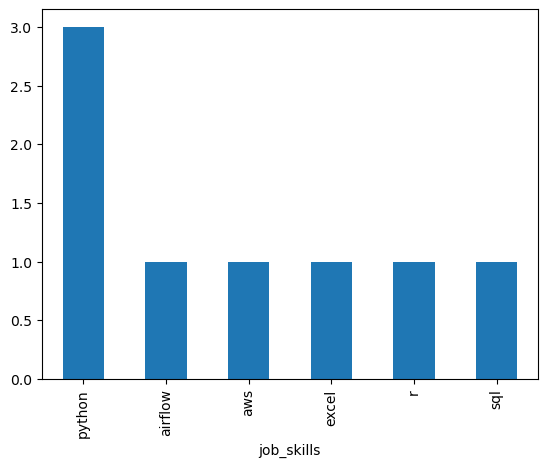

In [7]:
df_skills.explode('job_skills').value_counts('job_skills').plot(kind = 'bar')

In [8]:
# Convert string representation to actual list, checking for NaN values first
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

df[['job_title_short', 'job_skills']].head(5)

,job_title_short,job_skills
0,Senior Data Engineer,None
1,Data Analyst,"[r, python, sql, nosql, power bi, tableau]"
2,Data Engineer,"[python, sql, c#, azure, airflow, dax, docker,..."
3,Data Engineer,"[python, c++, java, matlab, aws, tensorflow, k..."
4,Data Engineer,"[bash, python, oracle, aws, ansible, puppet, j..."


<Axes: xlabel='job_skills'>

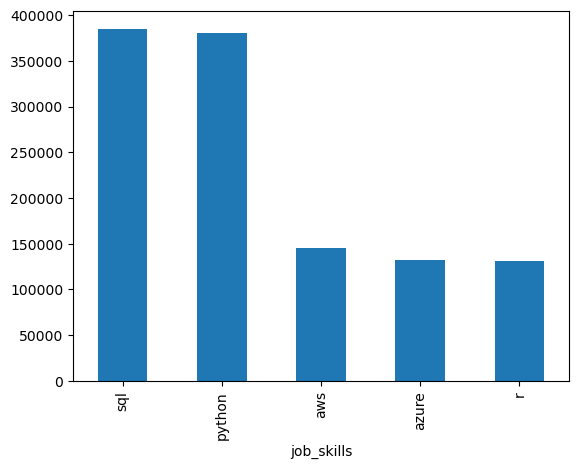

In [14]:
df_exploded = df.explode('job_skills')

df_exploded['job_skills'].value_counts().head().plot(kind = 'bar')

In [28]:
skills_count = df_exploded.groupby(['job_title_short', 'job_skills']).size()

df_skills_count = skills_count.reset_index(name = 'skills_count')

df_skills_count = df_skills_count.sort_values(by='skills_count', ascending=False)

df_skills_count



,job_title_short,job_skills,skills_count
1066,Data Scientist,python,113711
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
625,Data Analyst,sql,92428
1101,Data Scientist,sql,78982
...,...,...,...
266,Cloud Engineer,delphi,1
1920,Senior Data Scientist,objective-c,1
1400,Senior Data Analyst,couchdb,1
298,Cloud Engineer,haskell,1


Text(0.5, 0, 'Hello')

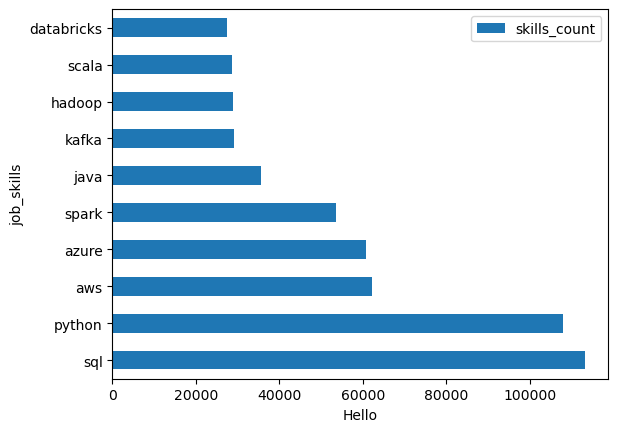

In [53]:
job_title = 'Data Engineer'
top_skills = 10

df_skill_final = df_skills_count[df_skills_count['job_title_short']==job_title].head(top_skills)

df_skill_final.reset_index()

df_skill_final2 = df_skill_final.set_index('job_skills')

df_skill_final2.plot(kind='barh')
plt.xlabel('Hello')

In [48]:
df_skill_final

,job_title_short,job_skills,skills_count
625,Data Analyst,sql,92428
494,Data Analyst,excel,66860
590,Data Analyst,python,57190
638,Data Analyst,tableau,46455
583,Data Analyst,power bi,39380
594,Data Analyst,r,29996
606,Data Analyst,sas,27998
585,Data Analyst,powerpoint,13822
664,Data Analyst,word,13562
605,Data Analyst,sap,11280


Text(0.5, 1.0, 'Top 10 skills for Data Engineer')

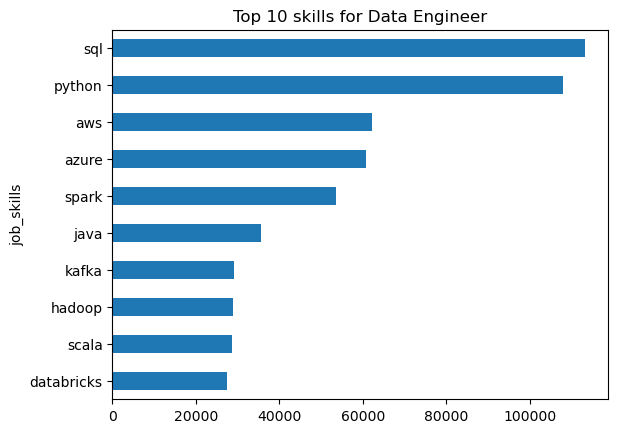

In [62]:
df_skill_final.plot(kind='barh', x='job_skills', y='skills_count')
plt.gca().invert_yaxis()
plt.legend().set_visible(False)
plt.title(f'Top {top_skills} skills for {job_title}')

In [69]:
df['job_skills'].astype(list)

TypeError: dtype '<class 'list'>' not understood

In [89]:
import pandas as pd
from datasets import load_dataset
import ast
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [75]:
type(df['job_skills'])

pandas.core.series.Series

In [82]:
df['job_skills'].explode().value_counts().sort_values(ascending=False).head(10)

job_skills
sql         384849
python      380909
aws         145381
azure       132527
r           130892
tableau     127213
excel       127018
spark       114609
power bi     98147
java         85612
Name: count, dtype: int64

In [94]:
CE_post = df[df['job_title'] == 'Cloud Engineer']

In [111]:
CE_skills = CE_post['job_skills'].explode().value_counts().sort_values(ascending=False).head(10)

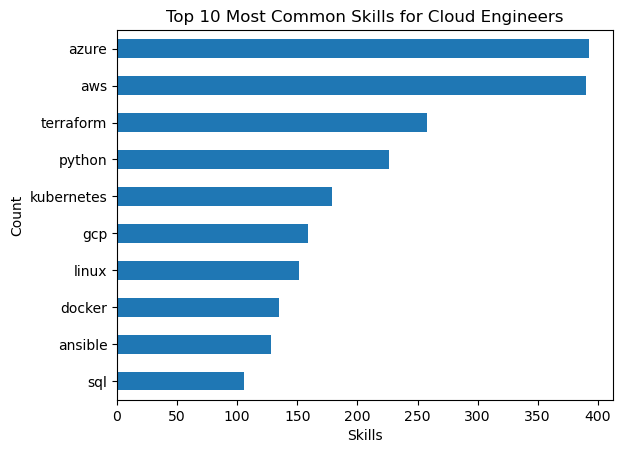

In [129]:
CE_skills.plot(kind='barh')
plt.xlabel('Skills')
plt.ylabel('Count')
plt.title('Top 10 Most Common Skills for Cloud Engineers')
plt.gca().invert_yaxis()

In [121]:
skills_pay = df[['job_skills', 'salary_year_avg']]

In [127]:
df_exploded = df.explode('job_skills')
skill_salary_avg = df_exploded.groupby('job_skills')['salary_year_avg'].mean().reset_index()
skill_salary_avg = skill_salary_avg.sort_values(by='salary_year_avg', ascending=False).head()
skill_salary_avg

,job_skills,salary_year_avg
46,debian,196500.000000
177,ringcentral,182500.000000
114,lua,170500.000000
126,mongo,169526.929749
54,dplyr,160667.210526
